<a href="https://colab.research.google.com/github/ClovisMallmann/XP_PA/blob/main/XP_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Carregamendo do Google drive para leitura dos Datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

# **1 - Carregamento dos dados e Tratamento**

In [4]:
tab_comportamentos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_comportamentos.csv', sep=';')
tab_fraldas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_fraldas.csv', sep=';')
tab_medicamentos_xls = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_medicamentos.xls')

In [5]:
tab_comportamentos.head(10)

,DATA,c_1,c_2,c_3,C-4
0,02/01/2023,1,0,0,0
1,03/01/2023,1,1,1,0
2,04/01/2023,1,1,1,0
3,05/01/2023,0,0,0,0
4,06/01/2023,0,0,0,0
5,07/01/2023,1,1,0,0
6,08/01/2023,0,0,0,0
7,09/01/2023,0,0,0,0
8,10/01/2023,1,0,0,0
9,11/01/2023,0,0,0,0


In [6]:
tab_fraldas.head(10)


,DATA,f_1,f_2
0,02/01/2023,4,1
1,03/01/2023,3,1
2,04/01/2023,3,1
3,05/01/2023,3,1
4,06/01/2023,4,1
5,07/01/2023,4,1
6,08/01/2023,3,1
7,09/01/2023,4,1
8,10/01/2023,4,1
9,11/01/2023,3,1


In [7]:
tab_medicamentos_xls.head(10)

,DATA,m_1,m_2,m_3,m_4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2023-01-02,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
1,2023-01-03,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
2,2023-01-04,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
3,2023-01-05,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
4,2023-01-06,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
5,2023-01-07,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
6,2023-01-08,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
7,2023-01-09,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN
8,2023-01-10,1,2,1,0.5,NaN,NaN,NaN,NaN,/
9,2023-01-11,1,2,1,0.5,NaN,NaN,NaN,NaN,NaN


In [8]:
#Excluindo as colunas desnecessárias

tab_medicamentos_xls = tab_medicamentos_xls.drop(columns=['Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'])
tab_medicamentos_xls.head(10)

,DATA,m_1,m_2,m_3,m_4
0,2023-01-02,1,2,1,0.5
1,2023-01-03,1,2,1,0.5
2,2023-01-04,1,2,1,0.5
3,2023-01-05,1,2,1,0.5
4,2023-01-06,1,2,1,0.5
5,2023-01-07,1,2,1,0.5
6,2023-01-08,1,2,1,0.5
7,2023-01-09,1,2,1,0.5
8,2023-01-10,1,2,1,0.5
9,2023-01-11,1,2,1,0.5


In [9]:
#Tratando a coluna DATA das tabelas para posteriormente,
#concatenar e formar uma base de dados só.


tab_comportamentos["DATA"]= pd.to_datetime(tab_comportamentos["DATA"])
tab_comportamentos["DATA"].dt.strftime('%Y-%m-%d')

tab_fraldas["DATA"]= pd.to_datetime(tab_fraldas["DATA"])
tab_comportamentos["DATA"].dt.strftime('%Y-%m-%d')


<ipython-input-9-44cb69eb494a>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tab_comportamentos["DATA"]= pd.to_datetime(tab_comportamentos["DATA"])
<ipython-input-9-44cb69eb494a>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tab_fraldas["DATA"]= pd.to_datetime(tab_fraldas["DATA"])


0      2023-02-01
1      2023-03-01
2      2023-04-01
3      2023-05-01
4      2023-06-01
          ...    
462    2024-08-04
463    2024-09-04
464    2024-10-04
465    2024-11-04
466    2024-12-04
Name: DATA, Length: 467, dtype: object

# **1.1 - Unindo as tabelas.**

In [10]:

df_a = pd.merge(tab_comportamentos, tab_fraldas, on=['DATA'], how='inner')
df_a

,DATA,c_1,c_2,c_3,C-4,f_1,f_2
0,2023-02-01,1,0,0,0,4,1
1,2023-03-01,1,1,1,0,3,1
2,2023-04-01,1,1,1,0,3,1
3,2023-05-01,0,0,0,0,3,1
4,2023-06-01,0,0,0,0,4,1
...,...,...,...,...,...,...,...
462,2024-08-04,0,0,0,0,5,1
463,2024-09-04,0,0,0,0,5,1
464,2024-10-04,0,0,0,0,4,1
465,2024-11-04,0,0,0,0,3,1


In [11]:
Dados = pd.merge(df_a, tab_medicamentos_xls, on=['DATA'], how='inner')
Dados.head(10)

,DATA,c_1,c_2,c_3,C-4,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-02-01,1,0,0,0,4,1,1,2,1,0.5
1,2023-03-01,1,1,1,0,3,1,1,2,1,0.5
2,2023-04-01,1,1,1,0,3,1,1,2,1,0.5
3,2023-05-01,0,0,0,0,3,1,1,2,1,0.5
4,2023-06-01,0,0,0,0,4,1,1,2,1,0.5
5,2023-07-01,1,1,0,0,4,1,1,2,1,0.5
6,2023-08-01,0,0,0,0,3,1,1,2,1,0.5
7,2023-09-01,0,0,0,0,4,1,1,2,1,0.5
8,2023-10-01,1,0,0,0,4,1,1,2,1,0.5
9,2023-11-01,0,0,0,0,3,1,1,2,1,0.5


In [12]:
#Renomeando as colunas
Dados.columns=['Mes',	'c_1',	'c_2',	'c_3',	'c_4',	'f_1',	'f_2',	'm_1',	'm_2',	'm_3',	'm_4']

In [13]:
Dados

,Mes,c_1,c_2,c_3,c_4,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-02-01,1,0,0,0,4,1,1,2,1,0.5
1,2023-03-01,1,1,1,0,3,1,1,2,1,0.5
2,2023-04-01,1,1,1,0,3,1,1,2,1,0.5
3,2023-05-01,0,0,0,0,3,1,1,2,1,0.5
4,2023-06-01,0,0,0,0,4,1,1,2,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...
430,2024-03-31,1,0,0,0,5,1,1,2,1,0.5
431,2024-01-04,0,0,0,0,3,1,1,2,1,1.0
432,2024-02-04,0,0,0,0,5,1,1,2,1,0.5
433,2024-03-04,0,0,0,0,5,1,2,2,1,0.5


# **1.2 - Tratando a coluna Mês**

In [14]:
#Indexando
Dados.index = Dados['Mes']

In [15]:
#Após o index, dropando a coluna duplicada
Dados = Dados.drop(columns=['Mes'])

In [16]:
#Modificando o DF
Dados = Dados.groupby(pd.Grouper(freq='M')).sum()

In [17]:
#Verificando
Dados.head(20)

,c_1,c_2,c_3,c_4,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,,,,
2023-01-31,7,3,1,1,110,30,30,60,30,15.0
2023-02-28,6,1,0,0,100,28,28,56,28,14.0
2023-03-31,11,3,2,1,105,31,31,62,31,15.5
2023-04-30,17,2,2,1,105,30,30,60,30,15.0
2023-05-31,16,7,3,1,107,31,31,62,31,15.5
2023-06-30,12,6,3,2,105,30,30,60,30,15.0
2023-07-31,17,8,6,6,111,31,31,62,31,15.5
2023-08-31,10,4,0,3,110,31,31,62,31,15.5
2023-09-30,13,2,4,1,105,30,30,60,30,15.0


# **1.3 - Modificações na coluna Mês: de Data completa para somente o Mês**

In [18]:
#Criando uma lista com meses

Meses = ['Jan23','Fev23','Mar23','Abr23','Mai23','Jun23','Jul23','Ago23','Set23','Out23','Nov23','Dez23','Jan24','Fev24','Mar24','Abr24']

In [19]:
#Inserindo a nova coluna com os Meses
Dados.insert(0,'Meses',Meses,True)

In [20]:
Dados.head(20)

,Meses,c_1,c_2,c_3,c_4,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,,,,,
2023-01-31,Jan23,7,3,1,1,110,30,30,60,30,15.0
2023-02-28,Fev23,6,1,0,0,100,28,28,56,28,14.0
2023-03-31,Mar23,11,3,2,1,105,31,31,62,31,15.5
2023-04-30,Abr23,17,2,2,1,105,30,30,60,30,15.0
2023-05-31,Mai23,16,7,3,1,107,31,31,62,31,15.5
2023-06-30,Jun23,12,6,3,2,105,30,30,60,30,15.0
2023-07-31,Jul23,17,8,6,6,111,31,31,62,31,15.5
2023-08-31,Ago23,10,4,0,3,110,31,31,62,31,15.5
2023-09-30,Set23,13,2,4,1,105,30,30,60,30,15.0


In [21]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2023-01-31 to 2024-04-30
Freq: M
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Meses   16 non-null     object 
 1   c_1     16 non-null     int64  
 2   c_2     16 non-null     int64  
 3   c_3     16 non-null     int64  
 4   c_4     16 non-null     int64  
 5   f_1     16 non-null     int64  
 6   f_2     16 non-null     int64  
 7   m_1     16 non-null     int64  
 8   m_2     16 non-null     int64  
 9   m_3     16 non-null     int64  
 10  m_4     16 non-null     float64
dtypes: float64(1), int64(9), object(1)
memory usage: 1.5+ KB


In [22]:
#Removendo o a coluna INDEX
Dados = Dados.reset_index(drop=True)

In [23]:
Dados = Dados.set_index('Meses')

# **1.4 - Prontificando o DF para estudos**

In [24]:
#Verificando
Dados.head(20)

,c_1,c_2,c_3,c_4,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,,,,
Jan23,7,3,1,1,110,30,30,60,30,15.0
Fev23,6,1,0,0,100,28,28,56,28,14.0
Mar23,11,3,2,1,105,31,31,62,31,15.5
Abr23,17,2,2,1,105,30,30,60,30,15.0
Mai23,16,7,3,1,107,31,31,62,31,15.5
Jun23,12,6,3,2,105,30,30,60,30,15.0
Jul23,17,8,6,6,111,31,31,62,31,15.5
Ago23,10,4,0,3,110,31,31,62,31,15.5
Set23,13,2,4,1,105,30,30,60,30,15.0


# **2 - Testando Gráficos**

<Axes: >

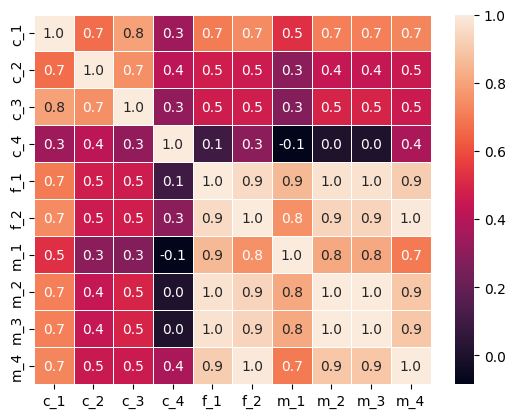

In [25]:
#teste = Dados.corr()
mapa_calor = sns.heatmap(Dados.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)
mapa_calor

In [41]:
Dados.describe()

,c_1,c_2,c_3,c_4,f_1,f_2,m_1,m_2,m_3,m_4
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.00000,16.000000
mean,11.500000,4.375000,2.312500,2.312500,98.375000,28.000000,28.500000,54.3750,27.18750,14.000000
std,4.457204,2.604483,1.851801,2.468974,22.896506,6.733003,7.174027,14.0327,7.01635,3.623994
min,1.000000,1.000000,0.000000,0.000000,17.000000,5.000000,4.000000,8.0000,4.00000,2.000000
25%,9.250000,2.000000,0.750000,1.000000,99.250000,29.500000,29.500000,53.5000,26.75000,14.750000
50%,12.500000,4.000000,2.000000,1.500000,105.000000,30.000000,30.000000,60.0000,30.00000,15.000000
75%,14.500000,6.250000,3.250000,2.250000,108.500000,31.000000,31.000000,62.0000,31.00000,15.500000
max,17.000000,9.000000,6.000000,10.000000,114.000000,33.000000,38.000000,62.0000,31.00000,18.000000


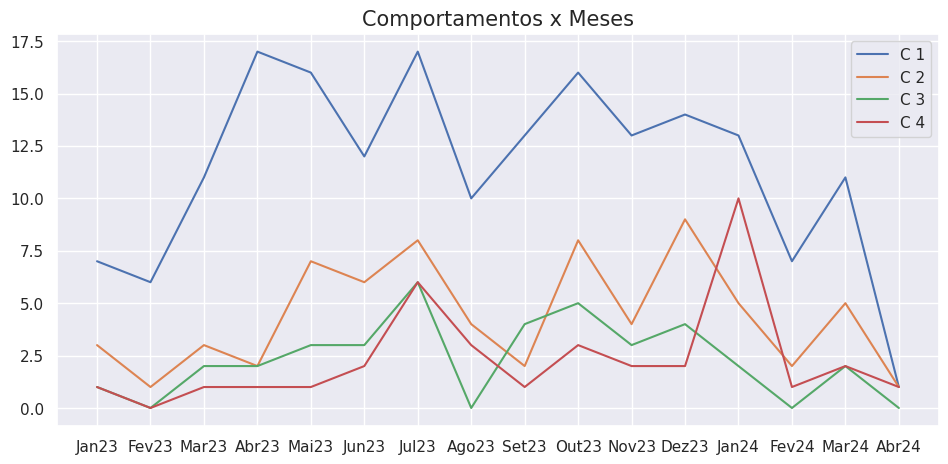

In [91]:
#Hsitograma de 1 coluna
#Dados.hist('c_1', figsize=(10,5), bins=10, facecolor='green',alpha=0.5)
#plt.show()

Dados_sem_index = pd.DataFrame(Dados.reset_index())

plt.subplots(figsize=(9,4))
plt.title("Comportamentos x Meses", fontsize=15)
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['c_1'],label='C 1')
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['c_2'],label='C 2')
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['c_3'],label='C 3')
plt.plot(Dados_sem_index['Meses'], Dados_sem_index['c_4'],label='C 4')

plt.legend()
plt.show()

In [122]:
plt.hist(x = Dados['m_1'],
         y = Dados['c_1'],
         color = "darkblue",
         bins = 20)
plt.title("valores de jan de 2010 a jan de 2022")
plt.suptitle("Histograma da variação mensal do IPCA")
plt.style.use('ggplot')

Error in callback <function _draw_all_if_interactive at 0x79bda99e9e10> (for post_execute):


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: ignored

ValueError: ignored

<Figure size 200x200 with 1 Axes>

# **3 - Gráficos por Personas**